# Aplicacion de Algoritmos de Morfologia a Imagenes de Melanomas Cutaneos

- Juan Manuel De La Torre. 
  
  CC. 1001.186.267  jdela@unal.edu.co
- Juliana Catalina De Castro Moreno. 
  
  CC. 1000.706.954  jdec@unal.edu.co

---

Todo el codigo fuente puede encontrarse en el siguiente repositorio:
[Github](https://github.com/JM-delatorre/TecnicasIA)

# Resumen

El presente informe se enfoca en el estudio exhaustivo del proceso de adelgazamiento y esqueletonización aplicado a imágenes de melanomas cutáneos. Se explorará la teoría subyacente a estos procesos, su implementación en el análisis de imágenes médicas y su aplicación específica en el estudio de melanomas cutáneos. Se presentarán los resultados obtenidos mediante la aplicación de estos algoritmos a un conjunto de imágenes de melanomas, así como conclusiones y recomendaciones para futuras investigaciones.

# Introduccion

El cáncer de piel, particularmente el melanoma cutáneo, representa un desafío significativo para la salud pública en todo el mundo. La detección temprana y precisa del melanoma es esencial para garantizar un tratamiento efectivo y mejorar la tasa de supervivencia de los pacientes afectados. En este contexto, el análisis de imágenes médicas desempeña un papel crucial al proporcionar información detallada sobre las características y la estructura de los melanomas cutáneos.

El proceso de adelgazamiento y esqueletonización de imágenes emerge como una herramienta prometedora para mejorar la precisión en la detección y caracterización de melanomas cutáneos. Estos algoritmos permiten simplificar la representación de los objetos en las imágenes, resaltando características relevantes y facilitando el análisis posterior. En este informe, se explorará en detalle el proceso de adelgazamiento y esqueletonización, así como su aplicación específica en el análisis de imágenes de melanomas cutáneos.

# Preparación de Ambiente


Primero se realiza una importacion de las diferentes librerias para trabajar con nuestras imagenes

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Adelgazamiento

Se implementó un algoritmo de adelgazamiento utilizando la técnica de erosión y dilatación repetidas. El objetivo de este proceso es reducir el grosor de los objetos presentes en la imagen binarizada, manteniendo su forma y conectividad

Es importante destacar que para la visualizacion final se aumento el brillo de la imagen para poder observar lo obtenido con el algoritmo

## Metodologia

- Binarización de imágenes:

  - Se convierten las imágenes originales en escala de grises.
  - Se aplican técnicas de binarización para convertir las imágenes en imágenes binarias, resaltando las áreas de interés, como los melanomas.

- Adelgazamiento iterativo:

  - Se implementa un algoritmo de adelgazamiento iterativo basado en el algoritmo de Zhang-Suen.
  - Se utiliza un kernel específico de 3x3 para realizar operaciones de erosión y dilatación alternadas en la imagen binarizada.
  - El proceso de adelgazamiento reduce el grosor de los objetos en la imagen, preservando su forma y conectividad.



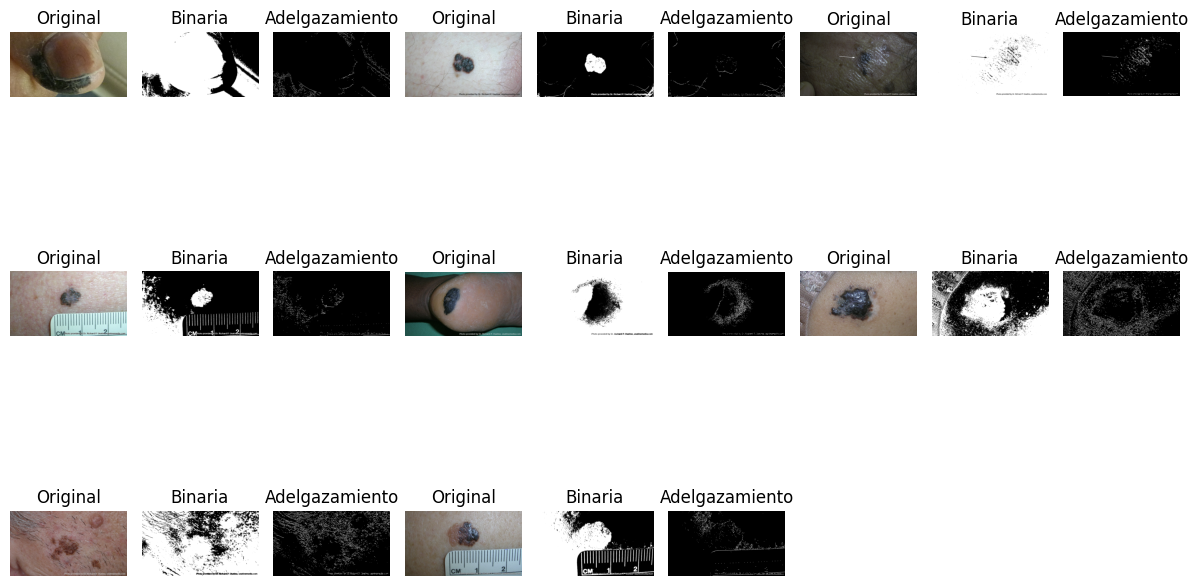

In [4]:
def thinning(image):

    kernel = np.array([[0, 0, 0],
                        [1, 1, 1],
                        [0, 1, 0]], dtype=np.uint8)


    prev = np.zeros_like(image)
    thin = image.copy()

    while True:
        eroded = cv2.morphologyEx(thin, cv2.MORPH_ERODE, kernel)
        dilated = cv2.morphologyEx(eroded, cv2.MORPH_DILATE, kernel)
        subtracted = cv2.subtract(thin, dilated)
        converge = np.all(prev == subtracted)
        thin = subtracted.copy()
        prev = subtracted.copy()
        if converge:
            break

    if np.all(thin == 0):
        thin = image.copy()

    kernel_dilate = np.ones((3, 3), np.uint8)
    thin = cv2.dilate(thin, kernel_dilate, iterations=1)

    return thin

def binarize(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    binary = cv2.bitwise_not(binary)

    return binary

folder_path = "Images/"

image_files = os.listdir(folder_path)

num_images = len(image_files)
num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols

plt.figure(figsize=(12, 8))

for i, filename in enumerate(image_files, 1):
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)

    binary_image = binarize(image)
    thinned_image = thinning(binary_image)

    plt.subplot(num_rows, num_cols * 3, i * 3 - 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis('off')
    plt.subplot(num_rows, num_cols * 3, i * 3 - 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binaria")
    plt.axis('off')
    plt.subplot(num_rows, num_cols * 3, i * 3)
    plt.imshow(thinned_image, cmap='gray')
    plt.title("Adelgazamiento")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Esqueleto

Se empleó un algoritmo de esqueletonización para obtener una representación más simplificada de los objetos en las imágenes. En este caso, se utilizó la función cv2.ximgproc.thinning de OpenCV para llevar a cabo esta operación.

## Metodologia

- Binarización de imágenes:

  - Se convierten las imágenes originales en escala de grises.
  - Se aplican técnicas de binarización para convertir las imágenes en imágenes binarias, resaltando las áreas de interés, como los melanomas.

- Esqueletonización:

  - Se utiliza la función cv2.ximgproc.thinning para obtener el esqueleto de la imagen binaria.

4.9.0


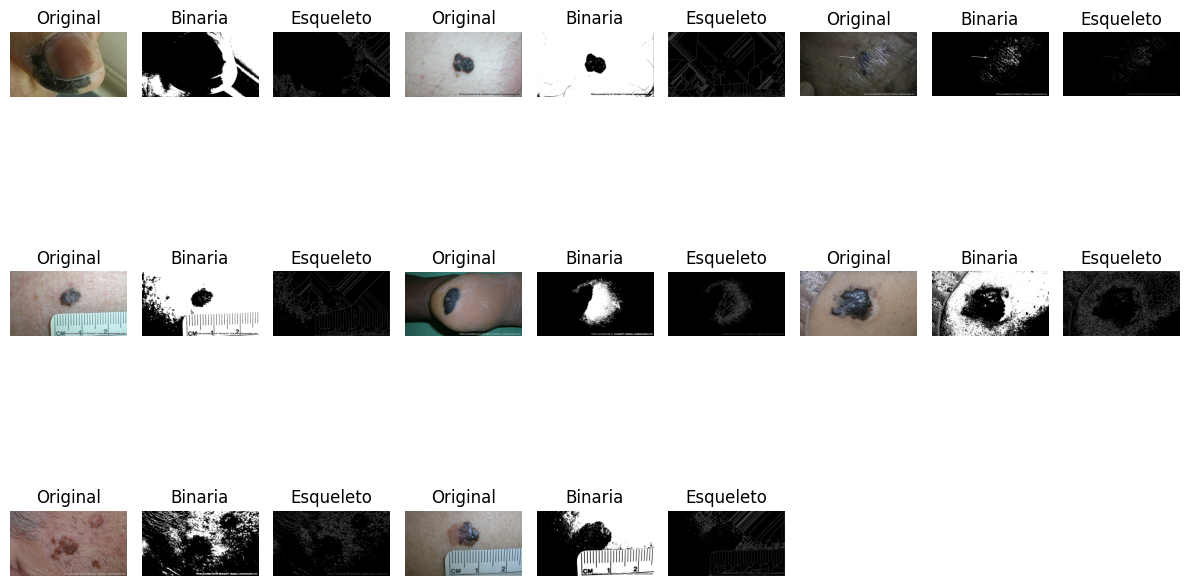

In [3]:
def skeletonize(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    skeleton = cv2.ximgproc.thinning(binary)
    return skeleton


print(cv2.__version__)
folder_path = "Images/"
image_files = os.listdir(folder_path)

num_images = len(image_files)
num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols
plt.figure(figsize=(12, 8))

for i, filename in enumerate(image_files, 1):
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    skeleton_image = skeletonize(image)

    plt.subplot(num_rows, num_cols * 3, (i - 1) * 3 + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis('off')
    plt.subplot(num_rows, num_cols * 3, (i - 1) * 3 + 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binaria")
    plt.axis('off')
    plt.subplot(num_rows, num_cols * 3, (i - 1) * 3 + 3)
    plt.imshow(skeleton_image, cmap='gray')
    plt.title("Esqueleto")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Analisis de Resultados

Los resultados obtenidos muestran que tanto el proceso de adelgazamiento como la esqueletonización son técnicas efectivas para simplificar la representación de los melanomas en las imágenes. Estos procesos permiten reducir el ruido y la redundancia en los datos, lo que facilita la posterior extracción de características y análisis de los melanomas.

Es importante destacar que la selección adecuada de los parámetros del algoritmo, así como el diseño del kernel utilizado, influyen significativamente en la calidad de los resultados obtenidos. Por lo tanto, es necesario realizar un ajuste fino de estos parámetros para cada conjunto de imágenes.

Para abordar nuestra meta de resaltar los melanomas en las imágenes diagnósticas, hemos observado que el proceso de adelgazamiento resulta ser notablemente más efectivo para nuestros propósitos. Este método nos proporciona una mayor claridad y más áreas destacadas, lo que facilita un análisis posterior más detallado. Por otro lado, aunque la esqueletonización logra reducir el ruido y revelar más detalles en la imagen, no ofrece la misma claridad y precisión que el proceso de adelgazamiento. 


# Bibliografía

- Banco de imágenes: https://www.cancer.org/es/cancer/tipos/cancer-de-piel/galeria-de-imagenes-del-cancer-de-piel.html?filter=Melanoma